In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('C:\\Users\\dcbs1\\Downloads\\Healthcare\\diabetes_data_upload.csv')


In [4]:


# Display the first few rows of the dataframe
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

# Convert categorical variables to category dtype
categorical_columns = df_cleaned.columns.drop('Age')  # Exclude 'Age' which is numeric
for column in categorical_columns:
    df_cleaned[column] = df_cleaned[column].astype('category')

# Confirm changes
df_cleaned.dtypes


C:\Users\dcbs1\AppData\Local\Temp\ipykernel_31896\1650246707.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = df_cleaned[column].astype('category')
C:\Users\dcbs1\AppData\Local\Temp\ipykernel_31896\1650246707.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = df_cleaned[column].astype('category')
C:\Users\dcbs1\AppData\Local\Temp\ipykernel_31896\1650246707.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Age                      int64
Gender                category
Polyuria              category
Polydipsia            category
sudden weight loss    category
weakness              category
Polyphagia            category
Genital thrush        category
visual blurring       category
Itching               category
Irritability          category
delayed healing       category
partial paresis       category
muscle stiffness      category
Alopecia              category
Obesity               category
class                 category
dtype: object

In [6]:
# Assuming 'df_cleaned' is your DataFrame and you're converting columns to 'category' dtype
for column in categorical_columns:
    df_cleaned.loc[:, column] = df_cleaned[column].astype('category')


C:\Users\dcbs1\AppData\Local\Temp\ipykernel_31896\3390645311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, column] = df_cleaned[column].astype('category')


In [7]:
df_cleaned = df.drop_duplicates().copy()


In [8]:
# List of columns to convert to categorical type, excluding 'Age'
categorical_columns = df_cleaned.columns.drop('Age')

# Convert each column to 'category' data type using .loc
for column in categorical_columns:
    df_cleaned.loc[:, column] = df_cleaned.loc[:, column].astype('category')


In [9]:
# Confirm the changes in data types
print(df_cleaned.dtypes)

# Optionally, check the first few rows to confirm the DataFrame looks as expected
print(df_cleaned.head())


Age                      int64
Gender                category
Polyuria              category
Polydipsia            category
sudden weight loss    category
weakness              category
Polyphagia            category
Genital thrush        category
visual blurring       category
Itching               category
Irritability          category
delayed healing       category
partial paresis       category
muscle stiffness      category
Alopecia              category
Obesity               category
class                 category
dtype: object
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  

In [10]:
# Descriptive statistics for all numerical columns
print(df_cleaned.describe())


              Age
count  251.000000
mean    48.864542
std     12.526036
min     16.000000
25%     39.000000
50%     48.000000
75%     58.000000
max     90.000000


In [11]:
# Example: Value counts for a categorical variable
print(df_cleaned['Gender'].value_counts())

# Similarly, you can explore other categorical variables


Male      160
Female     91
Name: Gender, dtype: int64


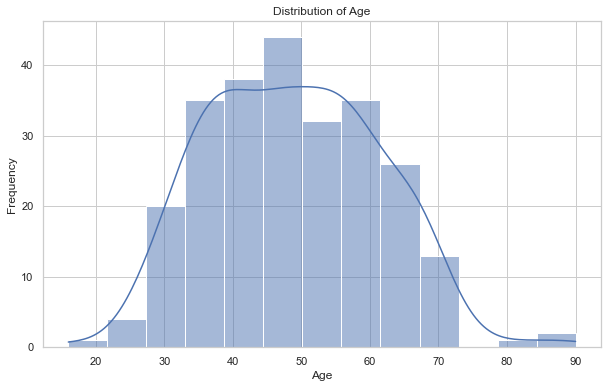

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # Set the aesthetic style of the plots

# Histogram for 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


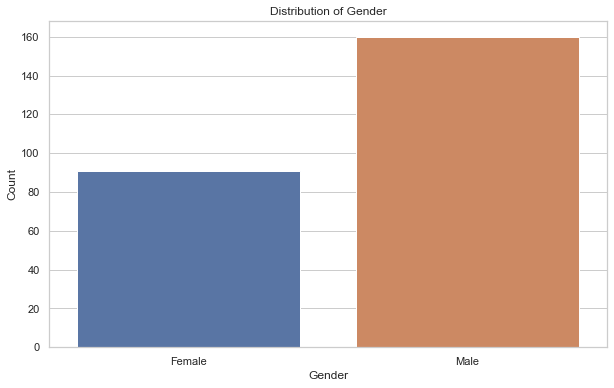

In [13]:
# Bar plot for 'Gender'
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df_cleaned)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


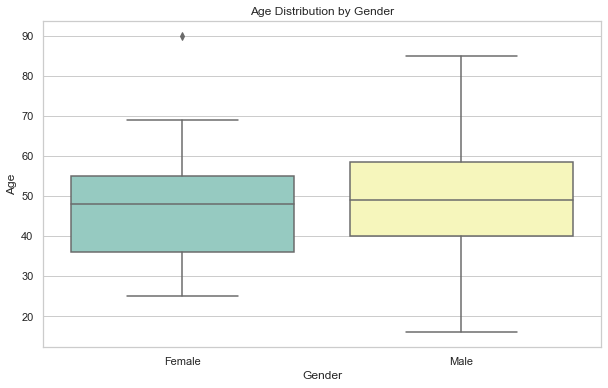

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df_cleaned, palette='Set3')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


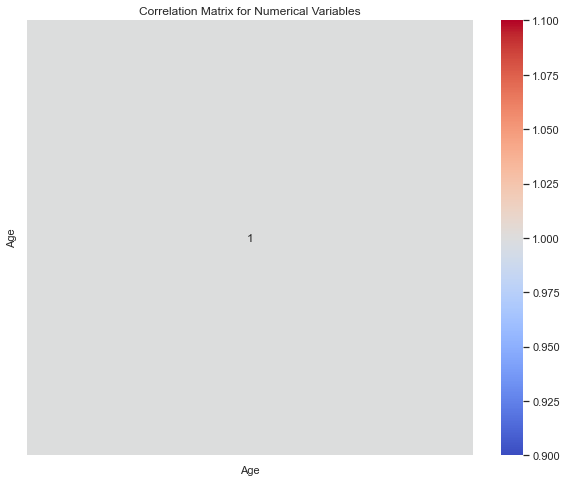

In [15]:
# Assuming there are other numerical variables for correlation analysis
correlation_matrix = df_cleaned.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()


In [16]:
grouped_data = df_cleaned.groupby('Gender')['Age'].mean()
print(grouped_data)


Gender
Female    47.054945
Male      49.893750
Name: Age, dtype: float64


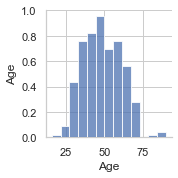

In [17]:

sns.pairplot(df_cleaned.select_dtypes(include=['int64', 'float64']))


# Predictive Modeling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])

# Separate features and target variable
X = df_cleaned.drop('class', axis=1)  # Features
y = df_cleaned['class']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8235
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        16
           1       0.82      0.94      0.88        35

    accuracy                           0.82        51
   macro avg       0.82      0.75      0.77        51
weighted avg       0.82      0.82      0.81        51



In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9216
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.92      0.97      0.94        35

    accuracy                           0.92        51
   macro avg       0.92      0.89      0.91        51
weighted avg       0.92      0.92      0.92        51



In [21]:
# Example of creating a new feature (this is hypothetical and depends on domain knowledge)
df_cleaned['Symptom_Combination'] = df_cleaned['Polyuria'] + df_cleaned['Polydipsia']

# Remember to encode this new feature if it's categorical before modeling
df_cleaned['Symptom_Combination'] = label_encoder.fit_transform(df_cleaned['Symptom_Combination'])


In [22]:
from sklearn.model_selection import cross_val_score

# Cross-validation with 5 folds
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print(f"CV Average Score: {cv_scores.mean():.4f}")


CV Average Score: 0.9084


Feature Age: 0.1022
Feature Gender: 0.0561
Feature Polyuria: 0.2074
Feature Polydipsia: 0.1859
Feature sudden weight loss: 0.0500
Feature weakness: 0.0259
Feature Polyphagia: 0.0409
Feature Genital thrush: 0.0504
Feature visual blurring: 0.0310
Feature Itching: 0.0317
Feature Irritability: 0.0364
Feature delayed healing: 0.0355
Feature partial paresis: 0.0543
Feature muscle stiffness: 0.0317
Feature Alopecia: 0.0415
Feature Obesity: 0.0192


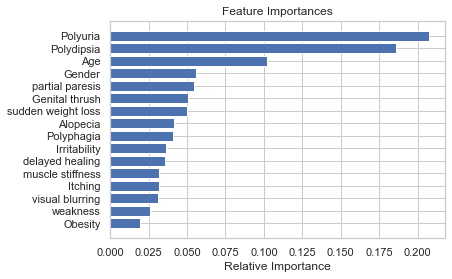

In [23]:
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_

# Summarize feature importances
for i, importance in enumerate(importances):
    print(f"Feature {X.columns[i]}: {importance:.4f}")

# You can also plot feature importances for a better visual understanding
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
